In [2]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['lines.linewidth'] = 0.1
plt.rcParams['lines.markersize'] = 3
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

In [1]:
import ou
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ff

In [3]:
print(ou.compute_struct.__doc__)

compute_struct(struct_bn,db)

Wrapper for ``compute_struct``.

Parameters
----------
struct_bn : in/output rank-2 array('d') with bounds (f2py_struct_bn_d0,f2py_struct_bn_d1)
db : input rank-2 array('d') with bounds (f2py_db_d0,f2py_db_d1)



In [19]:
a = np.zeros(shape=(2000,500000),order="F")
ou.ou_generator(1000,1,a)
a = np.ascontiguousarray(a).T
#np.save("../databases/gaussian_process",a)

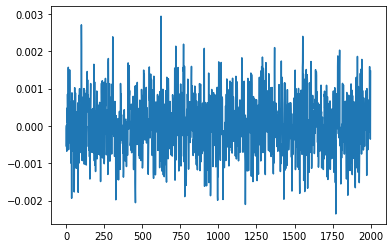

In [31]:
b = a[np.random.randint(0,100)]
c = np.gradient(b)
#plt.plot(b)
plt.plot(c)
plt.show()

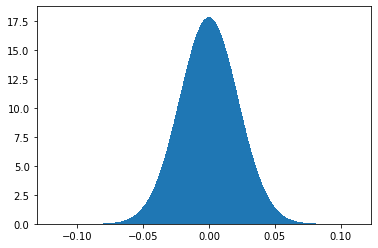

In [27]:
plt.hist(a.flatten(),bins=2000,density=True)
plt.show()

In [3]:
db = np.load('../databases/gaussian_process.npy')

In [7]:
#a = ff.gaussian_filter1d(db,sigma=5,mode='nearest') ## la gaussiana è troncata a 4 sigma
np.save('../databases/gaussian_process_smooth',a)

In [ ]:
plt.plot(db[1000,start:end])
plt.plot(a[1000,start:end])

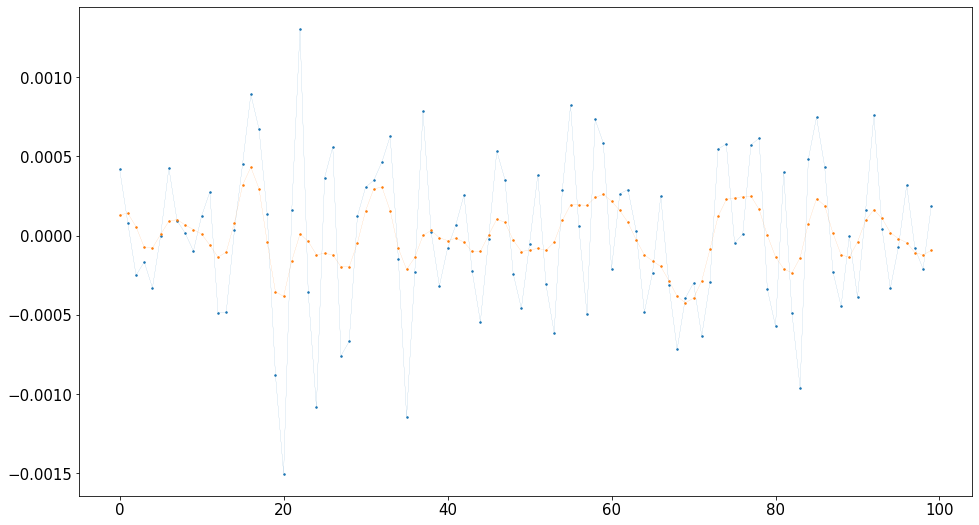

In [20]:
start = 100
end = 200
plt.plot(np.gradient(np.gradient(db[1000,start:end])))
plt.plot(np.gradient(np.gradient(a[1000,start:end])))

In [7]:
dbn.shape

(2000, 500000)

In [21]:
def compute_structure_function(db,npart=None):
    import ou
    import numpy as np
    struct = np.zeros(shape=(23,4),order='f')
    if db.shape[-1] != 1:
        if npart != None:
            idx = np.random.randint(0,db.shape[0],npart)
            dbn = np.asfortranarray(db[idx].T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
        elif npart == None:
            dbn = np.asfortranarray(db.T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
    elif db.shape[-1] == 1:
        if npart != None:
            idx = np.random.randint(0,db.shape[0],npart)
            dbn = np.asfortranarray(db[idx,:,0].T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
        elif npart == None:
            dbn = np.asfortranarray(db.T)
            ou.compute_struct(struct,dbn)
            return np.ascontiguousarray(struct)
        
struct_realss = compute_structure_function(a,5000)


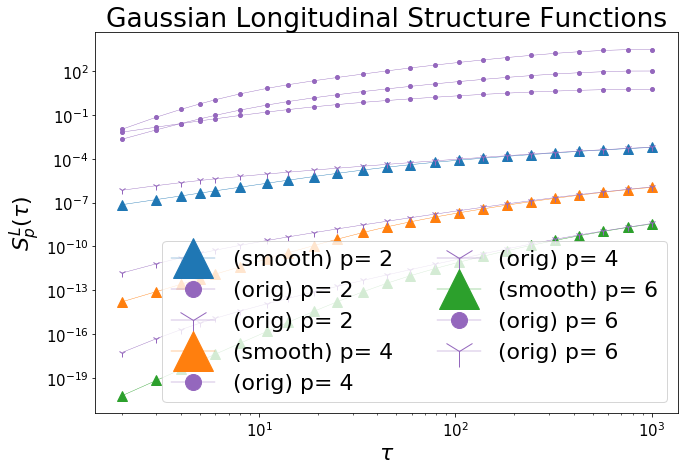

In [23]:
struct_real = np.load("../lagrangian/data/real/struct_function_327680_part.npy")
struct_reals = np.load(f"data/real/struct_function_500000_part_smooth.npy")
#struct_realss = np.load(f"data/real/struct_function_500000_part.npy")

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({'font.size': 22})


plt.figure(figsize=(10,7))
plt.title("Gaussian Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_reals[:,0],struct_reals[:,ii],label="(smooth) p= "+str((ii)*2),marker='^',lw=0.4,ms=10, color='C'+str(ii-1))
    plt.plot(struct_real[:,0],struct_real[:,ii],label="(orig) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C4')
    plt.plot(struct_realss[:,0],struct_realss[:,ii],label="(orig) p= "+str((ii)*2),marker='1',lw=0.4,ms=8, color='C4')

plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/real/struct_func",fmt="png",dpi=60)
plt.show()

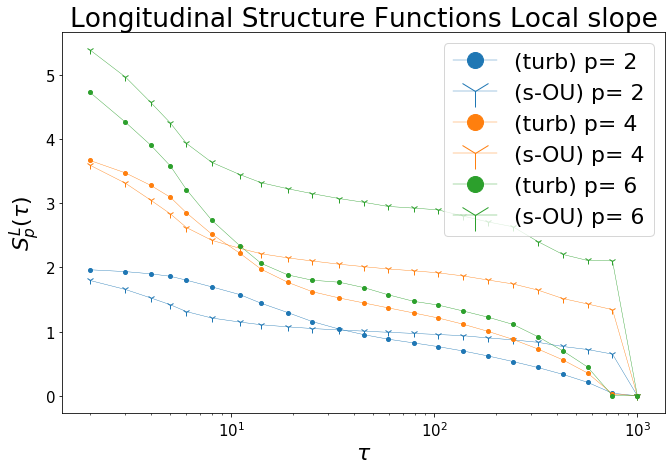

In [24]:
struct_real_log = np.log(struct_real)
dl_struct_real = np.zeros(shape=struct_real.shape)
struct_real_logs = np.log(struct_real)
dl_struct_reals = np.zeros(shape=struct_real.shape)
struct_real_logss = np.log(struct_realss)
dl_struct_realss = np.zeros(shape=struct_real.shape)
for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct_reals[jj,ii] = (np.log(struct_reals[jj+1,ii]) - np.log(struct_reals[jj,ii]))/(np.log(struct_reals[jj+1,0])-np.log(struct_reals[jj,0]))
        dl_struct_realss[jj,ii] = (np.log(struct_realss[jj+1,ii]) - np.log(struct_realss[jj,ii]))/(np.log(struct_realss[jj+1,0])-np.log(struct_realss[jj,0]))

plt.figure(figsize=(10,7))
plt.title("Longitudinal Structure Functions Local slope")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="(turb) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
    #plt.plot(struct_reals[:,0],dl_struct_reals[:,ii],label="(OU) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
    plt.plot(struct_realss[:,0],dl_struct_realss[:,ii],label="(s-OU) p= "+str((ii)*2),marker='1',lw=0.4,ms=8, color='C'+str(ii-1))
plt.xlabel("$\\tau$")
plt.legend()
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/real/struct_func_loc_slope",fmt="png",dpi=60)
plt.show()